### **利用gdal开源库进行栅格文件的读写**
1.遥感影像读入及信息查看。  
2.遥感影像写出（以近红外波段写出为例）。


In [1]:
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt


### 1. 遥感影像读入
#### gdal主要函数
gdal.Open():打开遥感影像。  
.RasterXSize, .RasterYSize, .RasterCount: 获取影像x,y方向尺寸，及波段数。  
.GetGeoTransform():获取地理转换参数。  
.GetProjection():获取投影信息。  
.GetRasterBand():获取影像波段。  
.ReadAsArray():将波段读入为np.array()。  




In [2]:
path_rsimg = 'data/section-4/s2_20m_6bands_chenggong.tif'


In [7]:
## 读入栅格数据，包括影像信息和地理信息
dset = gdal.Open(path_rsimg)
### 获得栅格数组尺寸
x_size, y_size, num_band = dset.RasterXSize, dset.RasterYSize, dset.RasterCount  ## 获取影像尺寸、波段数信息
print(f'xsize: {x_size}, ysize: {y_size}, num_band: {num_band}')
### 获得波段数组
band_NIR = dset.GetRasterBand(4)       ### 获取影像某一个波段（）!!!!索引从1开始。
band_NIR_array = band_NIR.ReadAsArray()    ### 将影像读入为np.array()格式
print('shape of array:', band_NIR_array.shape)
### 获得地理转换参数
geo_trans = dset.GetGeoTransform()  ### 获取地理转换参数：（左上角坐标x, 像元宽度，行旋转参数，左上角坐标y, 列旋转参数，像元高度）
print('geo_transform:', geo_trans)
### 获得投影信息
proj = dset.GetProjection()         ### 获取影像投影
print('projection:', proj)


xsize: 1497, ysize: 1611, num_band: 6
shape of array: (1611, 1497)
geo_transform: (268180.0, 20.0, 0.0, 2765440.0, 0.0, -20.0)
projection: PROJCS["WGS 84 / UTM zone 48N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32648"]]


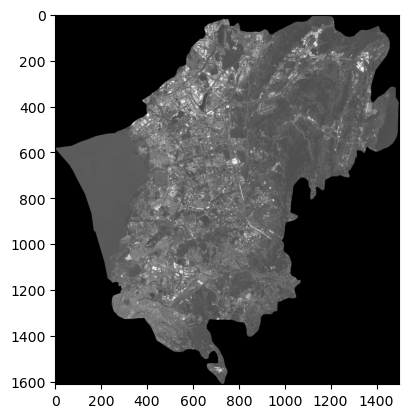

In [7]:
plt.figure()
plt.imshow(band_NIR_array, vmax=4000, vmin=0, cmap='gray')


### 2. 遥感影像写出（以近红外波段写出为例）
#### gdal主要函数:   
gdal.GetDriverByName():创建文件驱动。  
.Create(): 创建影像文件。  
.SetGeoTransform():设置地理转换参数。  
.SetProjection():设置投影。  
.WriteArray(): 将np.array()数组写入波段。  
.SetNoDataValue(): 设置无数据值，数据压缩。  



In [8]:
path_out = 'data/section-4/s2_20m_6bands_chenggong_NIR.tif'
driver = gdal.GetDriverByName("GTiff")  ## 创建.tif文件驱动
outdset = driver.Create(path_out, xsize=band_NIR_array.shape[1], \
                            ysize=band_NIR_array.shape[0], 
                            bands=1, 
                            eType=gdal.GDT_Int16)  ### 创建空的.tif数据
outdset.SetGeoTransform(geo_trans)     ### 设置地理转换参数
outdset.SetProjection(proj)            ### 设置投影
outband = outdset.GetRasterBand(1)     ### 获取波段1
outband.WriteArray(band_NIR_array)     ### 将np.array()数组写入波段1
outband.SetNoDataValue(np.nan)         ### 设置特定值为无数据，具有压缩功能
outdset = None    ## 关闭.tif文件驱动


### 课堂练习： 
1.利用gdal开源库读入Sentinel-2遥感影像数据，并写出红光波段。  
